$\textbf{Lemma 1: }$ For all matrices $U\in[-1, +1]^{N \times cT}$ and $w\in\mathbb{R}^{cT}$ with $||w||_1=1$ there exists a vector $w'$ where $||w'||_0\le T$ such that $||Uw-Uw'||_\infty=O(\sqrt{\text{lg}(n/T)/T})$.

...

# Sparsification with LightGBM
Practioneers often use Gradient Boosting libraries like <a href="https://github.com/dmlc/xgboost">XGBoost</a>, <a href="https://github.com/catboost/catboost">CatBoost</a> og <a href="https://github.com/Microsoft/LightGBM">LightGBM</a> instead of AdaBoost. Lemma 1 has no assumptions on the particular boosting algorithm and can be used to sparsify ensembles from any boosting algorithm. To illustrate how well our algorithm preserves margin distributions in practice, we trained a LightGBM classifier and constructuted a histogram of the obtained margins. These margins were compared with the margins of the sparsified ensembles. 

Datasets: Higgs and Airline. 

The choice of dataset was inspired by the <a href="https://arxiv.org/abs/1603.02754">XGBoost</a> and <a href="https://papers.nips.cc/paper/6907-lightgbm-a-highly-efficient-gradient-boosting-decision-tree">LightGBM</a> articles. XGBoost used Higgs and LightGBM used Airline (aka flightdelay). In both experients $n=10^6$ examples were drawn randomly and split into traning/test set of sizes 80 % and 20 % respectively. 

The following two plots show historgrams comparing the margin distribution of the full ensemble with different different sparsifications. If a sparsification perfectly preserved all margins the two histograms would exactly overlap. 

<img src="higgs_margin_distributions.png" width="700" height="100">
<img src="airline_margin_distributions.png" width="700" height="100">

The following plot displays the actual different $||Uw-Uw'||_\inf$ which Lemma 1 preserves up to $O(\sqrt{\text{lg}(n/T)/T})$. 

<img src="constant.png" with="300">

In the  <a href="https://arxiv.org/abs/1603.02754">XGBoost</a> and <a href="https://papers.nips.cc/paper/6907-lightgbm-a-highly-efficient-gradient-boosting-decision-tree">LightGBM</a> articles they report <a href="https://stats.stackexchange.com/questions/132777/what-does-auc-stand-for-and-what-is-it">AUC</a> score instead of classification accuracy. This is common practice with binary classification tasks when there the classes are not split 50/50. 

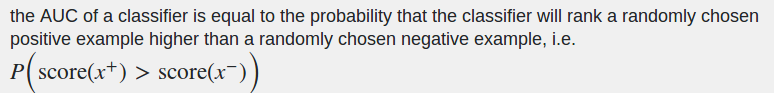

The previous articles reported AUC scores 0.8304 and 0.7846 on Higgs and Airline respectively. On Higgs they trained 500 hypotheses and use $n=10^6$ points to train. On Airline they trained 1000 hypotheses and used all $n=10^7$ points. Experimentally we found that approximately preserving margin distributions also approximately preserved AUC. Using the ensembles from the previous experiment, the plots below display training/test AUC of the sparsified ensembles and compares it with that of LightGBM when it had equally many hypotheses. Notice our initial margin preservation experiment used only $T=100$ hypotheses instead of $T=500,1000$ and $n=800 000$ instead of $n=10^6, 10^7$. The AUC we report, 0.81 and 0.75, are thus slightly lower than 0.8304 and 0.7846. 

<table>
<tr>
<td><img src="higgs_auc.png" width="500" height="375"></td>
<td><img src="airline_auc.png" width="500" height="375"></td>
 </tr>
</table>

Similarly we also computed binary classification error. 

<table>
    <tr>
        <td><img src="higgs_acc.png" width="500" height="375"></td>
        <td><img src="airline_acc.png" width="500" height="375"></td>
    </tr>
</table>

The label distribution of Airline is more skewed than that of Higgs. This might explain why we get a better AUC score but a worse accuracy score. 

<img src="label_distribution.jpg" width="400">


## Allstate (very difficult, got OOM and classes are 1% vs 99%)  (subsample =0.05)
I could only use $10^5$ points with 90%/10% train/test split, if I used much more points I got OOM, so we need to buy extra RAM so pc has 64 gigs or run it on clayton. On the Higgs/Airline dataset I observed that more points caused the sparsification to perform better relative to LightGBM trained directly. The bad results on this dataset might thus be because we used only $10^5$ instead of $10^6$ points.  

That said, it might also be because label distributions are very skewed, 1% vs 99%. Having such skewed datasets is an intersting challenge, but it is besides the points we are trying to make. I think we should just stay with Higgs and Airline and then maybe comment we found bad results if labels are skewed. 

<img src="allstate_margin_distributions.png" width="900" height="375">
$||Uw-Uw'||_\infty=2.0851E-01, 1.4024E-01, 0.0000E+00$

<table>
<tr>
<td><img src="allstate_acc.png" width="400" height="375"></td>
<td><img src="allstate_auc.png" width="400" height="375"></td>
    <td>In LightGBM article they get 0.609 AUC using all 11 million points and $T=500$</td>
</tr>
    
</table>





